This is a coding project made by Agamjot Sandhu to test different machine learning models and get an understanding for them

Importing dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras.utils import to_categorical


Importing the data

In [2]:
filePath = "/Users/agamjotsandhu/Desktop/Learning Data science/credit card fraud detection/creditcard.csv"
cardData = pd.read_csv(filePath)

Understanding the Data 

In [3]:
cardData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cardData.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
cardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
cardData.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
cardData["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Data is unbalanced, we will have to balance it ourselves

In [8]:
fraud = cardData[cardData.Class == 1]
legit = cardData[cardData.Class == 0]

In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
(cardData.groupby('Class').mean())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Some discrepency between the mean, maximum transaction value, and the time

{'whiskers': [<matplotlib.lines.Line2D at 0x17e70fbc0>,
 'caps': [<matplotlib.lines.Line2D at 0x17f92aa20>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e677050>,
 'medians': [<matplotlib.lines.Line2D at 0x17f92afc0>,
 'fliers': [],
 'means': []}

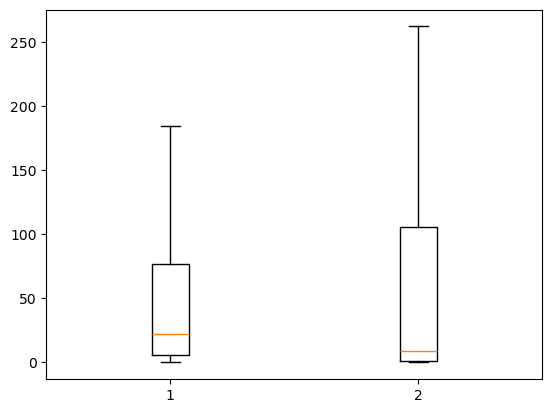

In [12]:
plt.boxplot([legit.Amount, fraud.Amount], showfliers = False)

Taking a random sample of the legit transactions

In [13]:
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)

Dividing the data into the explanatory and response variables

In [14]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

First utilising Logistical Regression to perform analysis

In [15]:
logic = LogisticRegression(random_state=1, max_iter=5000)
logic.fit(X_train, Y_train)

# testing how accurate the model is
X_train_prediction = logic.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f'Logistical Regression accuracy on Training data : {training_data_accuracy}')

# accuracy on test data
X_test_prediction = logic.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)  
print(f'Logistical Regression accuracy score on Test Data : {test_data_accuracy} \n')

Logistical Regression accuracy on Training data : 0.9593392630241423
Logistical Regression accuracy score on Test Data : 0.9289340101522843 



Testing Random Forest Classifier

In [16]:
random = RandomForestClassifier(random_state=1)
random.fit(X_train, Y_train)

# testing how accurate the model is
X_train_prediction = random.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f'Random Forest Classifier accuracy on Training data : {training_data_accuracy}')

# accuracy on test data
X_test_prediction = random.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)  
print(f'Random Forest Classifier accuracy score on Test Data : {test_data_accuracy} \n')

Random Forest Classifier accuracy on Training data : 1.0
Random Forest Classifier accuracy score on Test Data : 0.934010152284264 



Testing Extreme Gradient boosting

In [22]:
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)

# testing how accurate the model is
X_train_prediction = XGB.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f'XGB classifier accuracy on Training data : {training_data_accuracy}')


# accuracy on test data
X_test_prediction = XGB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)  
print(f'XGB Classifier accuracy score on Test Data : {test_data_accuracy} \n')

XGB classifier accuracy on Training data : 1.0
(787, 30)
XGB Classifier accuracy score on Test Data : 0.9238578680203046 



Testing Neural Networks

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-06 21:56:51.484050: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [

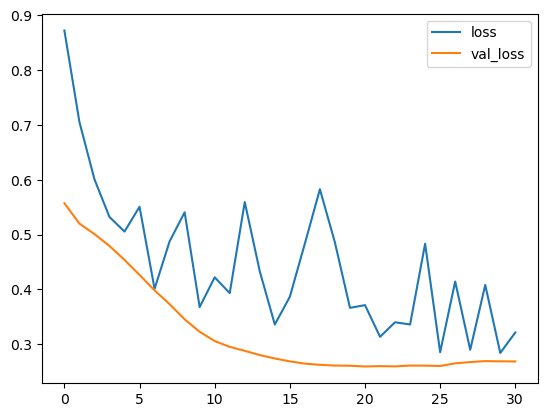

In [37]:
NN = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(units = 50, activation = 'relu', input_shape = [30]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units = 50, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units = 50, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation = 'sigmoid')
])

NN.compile(
    optimizer = 'adam',
    loss= 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 10,
    restore_best_weights = True
)

history = NN.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    batch_size = 100,
    epochs = 500,
    callbacks = [early_stopping],
    verbose = 0
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

X_test_prediction = np.round(NN.predict(X_test), decimals = 0)
print(X_test_prediction)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)  
print(f'Neural Network accuracy score on Test Data : {test_data_accuracy} \n')
